In [2]:
# Import packages
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score

In [5]:
# Define, clean and partitionate the data
df_wdi = pd.read_csv(r"C:\Users\Usuario\Downloads\gdp_perc_growth_2004_2024.csv", sep=";", decimal=',')
df_wdi = df_wdi.dropna()
df_wdi.columns = [col.split(' [')[0] if ' [' in col else col for col in df_wdi.columns]
df_wdi.head(3)

,Country Code,2004,2005,2006,2007,2008,2009,2010,2011,2012,...,2015,2016,2017,2018,2019,2020,2021,2022,2023,2024
0,USA,2.89,2.53,1.80,1.04,-0.82,-3.43,1.83,0.76,1.48,...,2.13,1.02,1.75,2.36,2.06,-2.56,0.59,1.92,2.04,1.80
1,LUX,2.76,0.93,4.34,6.44,-2.06,-5.01,1.88,-1.18,-0.76,...,-0.12,2.74,-1.12,-0.33,0.75,-2.15,5.32,-3.07,-2.68,-0.65
2,CHE,2.00,2.09,3.42,2.99,1.51,-3.51,2.17,0.69,0.11,...,0.49,0.96,0.42,2.11,0.42,-2.85,4.75,0.22,-0.57,-0.33


In [7]:
# Data partitioning in groups
df_wdi['Pre_Crisis_Growth (2004-2008)'] = df_wdi.loc[:, '2004':'2008'].mean(axis=1, skipna=True)
df_wdi['Recuperation_Growth (2009-2013)'] = df_wdi.loc[:, '2009':'2013'].mean(axis=1, skipna=True)
df_wdi['Stability_Growth (2014-2018)'] = df_wdi.loc[:, '2014':'2018'].mean(axis=1, skipna=True)
df_wdi['Recent_Growth (2019-2024)'] = df_wdi.loc[:, '2019':'2024'].mean(axis=1, skipna=True)

results = df_wdi[['Country Code', 'Pre_Crisis_Growth (2004-2008)', 'Recuperation_Growth (2009-2013)', 
                  'Stability_Growth (2014-2018)', 'Recent_Growth (2019-2024)']]
                  
emerging = ['CHL', 'POL', 'ETH', 'VNM', 'IND', 'EGY', 'IDN', 'PER', 'MAR', 'PHL', 'NGA', 'BGD', 'PAK', 'MOZ']
developed = ['USA', 'CHE', 'LUX', 'GBR', 'KOR', 'IRL', 'DEU', 'ESP', 'JPN', 'CAN', 'AUS', 'NOR', 'NLD', 'DNK', 'SWE', 'FIN']

df_wdi['Group'] = df_wdi['Country Code'].apply(lambda x: 'Emerging' if x in emerging else 'Developed' if x in developed else 'Other')

results.round(2).head(3)

,Country Code,Pre_Crisis_Growth (2004-2008),Recuperation_Growth (2009-2013),Stability_Growth (2014-2018),Recent_Growth (2019-2024)
0,USA,1.49,0.40,1.79,0.98
1,LUX,2.48,-0.85,0.28,-0.41
2,CHE,2.40,0.02,1.02,0.27


In [13]:
# Function with group, beta-coeficient and r2
def plot_beta_convergence(data, x_col, y_col, x_label, y_label, title, groups=['Emerging', 'Developed']):
    plt.figure(figsize=(10, 6))
    colors = {'Emerging': 'blue', 'Developed': 'orange'}
    for group in groups:
        subset = data[data['Group'] == group].dropna(subset=[x_col, y_col])
        X = subset[[x_col]]
        y = subset[y_col]
        model = LinearRegression().fit(X, y)
        r2 = r2_score(y, model.predict(X))
        plt.scatter(X, y, label=f'{group} data', color=colors[group], alpha=0.5)
        plt.plot(X, model.predict(X), linestyle='-', color=colors[group], 
                 label=f'{group} (β = {model.coef_[0]:.2f}, R² = {r2:.2f})')
    
    plt.title(title, fontsize=14, pad=15)
    plt.xlabel(x_label, fontsize=12)
    plt.ylabel(y_label, fontsize=12)
    plt.legend()
    plt.grid(alpha=0.4)
    plt.tight_layout()
    plt.show()

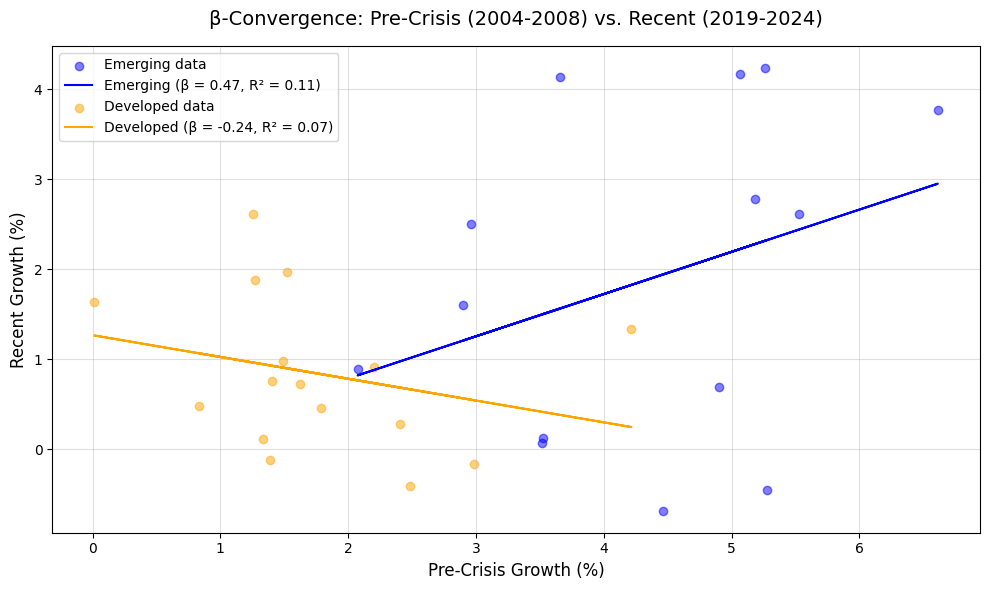

In [14]:
# First plot
plot_beta_convergence(
    df_wdi, 
    'Pre_Crisis_Growth (2004-2008)', 'Recent_Growth (2019-2024)',
    'Pre-Crisis Growth (%)', 'Recent Growth (%)',
    'β-Convergence: Pre-Crisis (2004-2008) vs. Recent (2019-2024)'
)

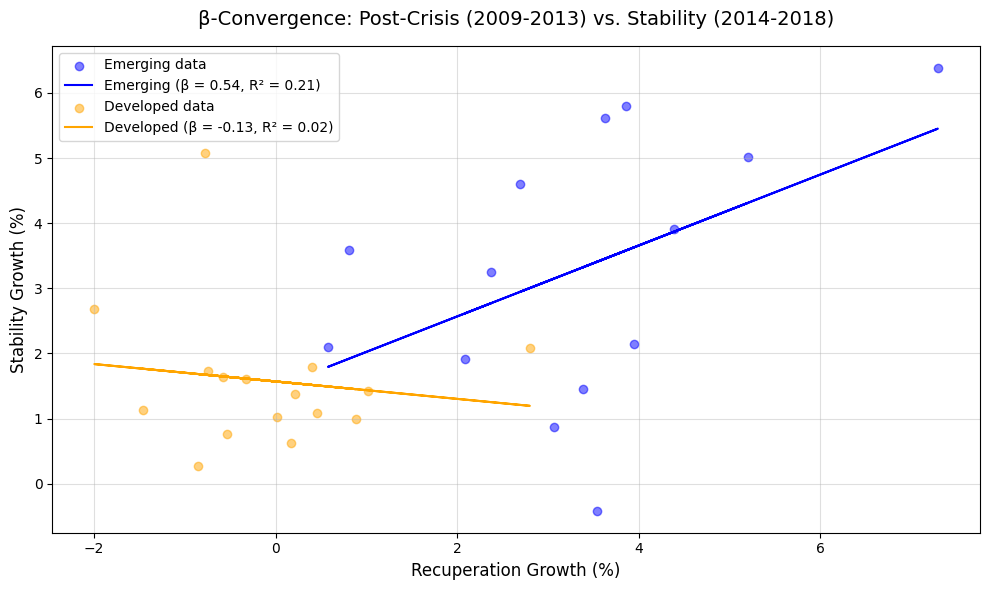

In [15]:
# Second plot
plot_beta_convergence(
    df_wdi, 
    'Recuperation_Growth (2009-2013)', 'Stability_Growth (2014-2018)',
    'Recuperation Growth (%)', 'Stability Growth (%)',
    'β-Convergence: Post-Crisis (2009-2013) vs. Stability (2014-2018)'
)

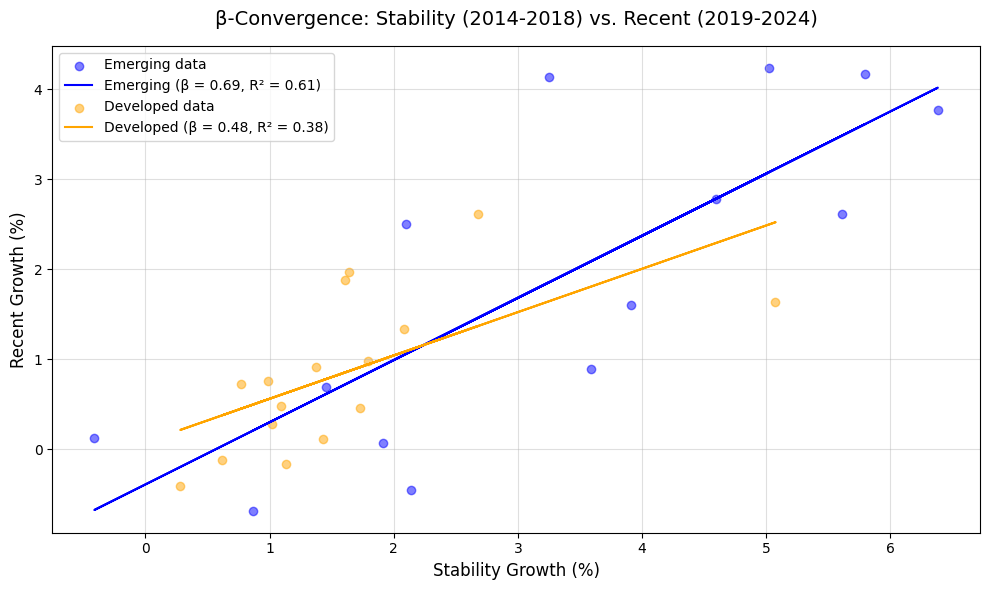

In [16]:
# Third plot
plot_beta_convergence(
    df_wdi, 
    'Stability_Growth (2014-2018)', 'Recent_Growth (2019-2024)',
    'Stability Growth (%)', 'Recent Growth (%)',
    'β-Convergence: Stability (2014-2018) vs. Recent (2019-2024)'
)